## **CT1-MLOPS COURSE GROUP ASSIGNMENT** ##

> **Use Case ::** Predicting Student Grade

> **Dataset Source ::** Kaggle - https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data

> **Group No. ::** 12

## **STEP 1 TO 7 COVERED IN THIS NOTEBOOK**

In [ ]:
pip install PyGithub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.9/375.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 29.2 MB/s eta 0:00:00


In [ ]:
# Import necessary library and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import requests
import base64
from github import Github
from getpass import getpass
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, classification_report, accuracy_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Importing Google colab and drive related libraries
from google.colab import drive
from google.colab import userdata

# Setting the no. of records display in output and no. of characters displayed in a column
pd.options.display.max_columns = 20 # Max 20 rows displayed. First and Last 10 rows shown, if limit exceeded
pd.options.display.max_rows = 20 # Max 20 columns displayed. First and Last 10 columns shown, if limit exceeded
pd.options.display.max_colwidth = 80 # Max of 80 characters displayed per column. Post limit truncated with an ellipsis (...)
np.set_printoptions(precision=4, suppress=True) # Displays only upto 4 decimals.

# Using "warnings" module to suppress/ignore warnings thrown by methods
import warnings
warnings.filterwarnings('ignore')


### **I.  Dataset Schema and Storage**
> Defining the dataset schema and storing the final data in Parquet format.

#### **Reading the Dataset**

In [ ]:
# Importing the dataset stored in csv format from github
completeData_df = pd.read_parquet("https://raw.githubusercontent.com/Sri1911/ML-Ops-ISB-Proj/main/Dataset/studentPerformance_completeData.parquet")

In [ ]:
completeData_df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


#### **Dataset column definition**

> **Student ID**
>> **StudentID:** A unique identifier assigned to each student (1001 to 3392).

> **Demographic Details**

>>**Age:** The age of the students ranges from 15 to 18 years.

>>**Gender:** Gender of the students, where 0 represents Male and 1 represents Female.

>>**Ethnicity:** The ethnicity of the students, coded as follows:
 >>- 0: Caucasian
 >>- 1: African American
 >>- 2: Asian
 >>- 3: Other

>>**ParentalEducation:** The education level of the parents, coded as follows:
 >>- 0: None
 >>- 1: High School
 >>- 2: Some College
 >>- 3: Bachelor's
 >>- 4: Higher

> **Study Habits**

>> **StudyTimeWeekly:** Weekly study time in hours, ranging from 0 to 20.

>> **Absences:** Number of absences during the school year, ranging from 0 to 30.

>> **Tutoring:** Tutoring status, where 0 indicates No and 1 indicates Yes.

> **Parental Involvement**
>> **ParentalSupport:** The level of parental support, coded as follows:
>> - 0: None
>> - 1: Low
>> - 2: Moderate
>> - 3: High
>> - 4: Very High

>**Extracurricular Activities**
>> **Extracurricular:** Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.

>> **Sports:** Participation in sports, where 0 indicates No and 1 indicates Yes.

>> **Music:** Participation in music activities, where 0 indicates No and 1 indicates Yes.

>> **Volunteering:** Participation in volunteering, where 0 indicates No and 1 indicates Yes.

>**Academic Performance**
>> **GPA:** Grade Point Average on a scale from 0.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

>**Target Variable:**
>> **GradeClass:** Classification of students' grades based on GPA:
>>- 0: 'A' (GPA >= 3.5)
>>- 1: 'B' (3.0 <= GPA < 3.5)
>>- 2: 'C' (2.5 <= GPA < 3.0)
>>- 3: 'D' (2.0 <= GPA < 2.5)
>>- 4: 'E' (GPA < 2.0)


#### **Optimizing data types**

In [ ]:
completeData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [ ]:
completeData_df.shape

(2392, 15)

In [ ]:
completeData_df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


#### **Defining the Schema and validating the dataset**
> We will be validating the following for each column::
>> - For numeric feature, we check if all the values in the column are numeric.
>> - For categorical feature a set of all possible values is defined, we check if each of the column values fall in the set.
>> - Whether the field contains null/empty values.  

In [ ]:
#Defining a schema containing field and possible values combination
schema_definition = {
   'StudentID' : {               # Possible values range cannot be determined hence we keep it empty
       'numeric_type' : True,
       'possible_values' : [],
       'null_empty' : False
   },
    'Age' : {
        'numeric_type' : True,
        'possible_values' : [15, 16, 17, 18],
        'type' : 'list',
        'null_empty' : False
   },
    'Gender' : {
        'numeric_type' : True,
        'possible_values' : [0, 1],
        'type' : 'list',
        'null_empty' : False
   },
    'Ethnicity' : {
        'numeric_type' : True,
        'possible_values' : [0, 1, 2, 3],
        'type' : 'list',
        'null_empty' : False
   },
    'ParentalEducation' : {
        'numeric_type' : True,
        'possible_values' : [0, 1, 2, 3, 4],
        'type' : 'list',
        'null_empty' : False
   },
    'StudyTimeWeekly' : {
        'numeric_type' : True,
        'possible_values' : [0,21], # Since a float value, we will checking if it lies b/w the given min-max range
        'type' : 'min-max',
        'null_empty' : False
   },
    'Absences' : {
        'numeric_type' : True,
        'possible_values' : list(range(31)),
        'type' : 'list',
        'null_empty' : False
   },
    'Tutoring' : {
        'numeric_type' : True,
        'possible_values' : [0, 1],
        'type' : 'list',
        'null_empty' : False
   },
    'ParentalSupport' : {
        'numeric_type' : True,
        'possible_values' : [0, 1, 2, 3, 4],
        'type' : 'list',
        'null_empty' : False
   },
    'Extracurricular' : {
        'numeric_type' : True,
        'possible_values' : [0, 1],
        'type' : 'list',
        'null_empty' : False
   },
    'Sports' : {
        'numeric_type' : True,
        'possible_values' : [0, 1],
        'type' : 'list',
        'null_empty' : False
   },
    'Music' : {
        'numeric_type' : True,
        'possible_values' : [0, 1],
        'type' : 'list',
        'null_empty' : False
   },
    'Volunteering' : {
        'numeric_type' : True,
        'possible_values' : [0, 1],
        'type' : 'list',
        'null_empty' : False
   },
    'GPA' : {
        'numeric_type' : True,
        'possible_values' : [0,4], # Since a float value, we will checking if it lies b/w the given min-max range
        'type' : 'min-max',
        'null_empty' : False
   },
    'GradeClass' : {
        'numeric_type' : True,
        'possible_values' : [0, 1, 2, 3, 4],
        'type' : 'list',
        'null_empty' : False
   }
}

In [ ]:
# Capture all the validation failures - column name, record no. under where violation happened along with its type
validation_failed = {}

# Validating if all the values satisfy the rules defined in schema_definition
for colmn_name, rules in schema_definition.items():
    validation_failed [colmn_name]= {}

    # For the selected column, applying the rule check to each element
    for index in range(completeData_df.shape[0]):
        validation_failed[colmn_name][index] = {}

        # If 'null_empty' = False, check if the field value is null
        if (rules['null_empty']==False and
            completeData_df[colmn_name].iloc[index]==None):
            validation_failed[colmn_name][index]['null_check']='Failed'
            continue

        # If numeric_type = True, checking if all the values in column are numeric in nature
        if (rules['numeric_type']==True and isinstance(completeData_df[colmn_name].iloc[index],(np.int64, np.float64))==False):
            validation_failed[colmn_name][index]['numeric_value_check']='Failed'

        elif (rules['numeric_type']==True and isinstance(completeData_df[colmn_name].iloc[index],(np.int64, np.float64))==True):

            # If the values is numeric, we check if possible values is defined in rules
            #and if defined then does it lies in allowed value/range
            if (rules['possible_values']!=[] and rules['type']=='list' and
                completeData_df[colmn_name].iloc[index] not in rules['possible_values']):
                validation_failed[colmn_name][index]['valid_value_check']='Failed'
            if (rules['possible_values']!=[] and rules['type']=='min-max' and
                completeData_df[colmn_name].iloc[index] < rules['possible_values'][0] and
                completeData_df[colmn_name].iloc[index] > rules['possible_values'][1]):
                validation_failed[colmn_name][index]['valid_value_check']='Failed'

        # If numeric_type = False, checking if all the values in column are non-numeric in nature
        if (rules['numeric_type']==False and completeData_df[colmn_name].iloc[index].isnumeric()==True):
            validation_failed[colmn_name][index]['non-numeric_value_check']='Failed'

        elif (rules['numeric_type']==False and completeData_df[colmn_name].iloc[index].isnumeric()==False):

            # If the values is non-numeric, we check if possible values is defined in rules
            #and if defined then does it lies in allowed value/range
            if (rules['possible_values']!=[] and rules['type']=='list' and
                completeData_df[colmn_name].iloc[index] in rules['possible_values']):
                validation_failed[colmn_name][index]['valid_value_check']='Failed'

        # If there are no violations for the selected element, we delete the null item created
        # for the element in column name item from violation_failed dict
        if validation_failed[colmn_name][index]=={} : validation_failed[colmn_name].pop(index)

    # If there are no violations for the selected column, we delete the null item created for the column name
    #from violation_failed dict
    if validation_failed[colmn_name]=={} : validation_failed.pop(colmn_name)

In [ ]:
# Displaying the rule-check violations
validation_failed

{}

**CONCLUSION ::**  From the outcome of above validation checks (stored in  "*validation_failed*" dict)  we are able to see that there are no violations and hence, we can conclude that we **don't need to carry out any kind of data correction or data imputation operation**.

#### **Filtering Dataset**
> We will be dropping the columns we will not be using for training the model (not a part of feature or target set).
>> - **"StudentID" ::** the field acts as a unique identifier.
>> - **"GPA" ::** since "GradeClass" (classified value) is being used as Target variable which is based on "GPA" (actual grade obtained by student), hence we will be dropping the GPA column from dataset.    

In [ ]:
filteredData_df = completeData_df.drop(columns= ['StudentID','GPA'])

In [ ]:
filteredData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   int64  
 2   Ethnicity          2392 non-null   int64  
 3   ParentalEducation  2392 non-null   int64  
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   int64  
 8   Extracurricular    2392 non-null   int64  
 9   Sports             2392 non-null   int64  
 10  Music              2392 non-null   int64  
 11  Volunteering       2392 non-null   int64  
 12  GradeClass         2392 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 243.1 KB


#### **Exporting data in Parquet Format**

In [ ]:
completeData_df.to_parquet("studentPerformance_completeData.parquet")
filteredData_df.to_parquet("studentPerformance_filteredData.parquet")

### **II. Profiling of the Dataset**
> Creating a profile report using ydata-profiling library.

> **Pandas Profiling (ydata-profiling) -**
Pandas Profiling is used to generate a complete and exhaustive report for the dataset, with many features and customizations in the generated report. This report includes various pieces of information such as dataset statistics, distribution of values, missing values, memory usage, etc., which are very useful for exploring and analyzing data efficiently.

>Pandas Profiling also helps a lot in Exploratory Data Analysis (EDA). EDA is used to understand the underlying structure of data, detect patterns, and generate insights in a visual format.

**source ::** *https://www.datacamp.com/tutorial/pandas-profiling-ydata-profiling-in-python-guide*


**Steps Taken::**
1. We will be using the **ProfileReport** method and apply it to the the filtered dataset to generate its profile report.
2. The Profile document generated is an HTML document and will be displayed onto the notebook for using the HTML element called **iframe**.


In [ ]:
pip install ydata_profiling --no-warn-script-location

In [ ]:
# Importing "ProfileReport" module from ydata-profiling library to generate the profile report
from ydata_profiling import ProfileReport

#### **Creating Data Profile**

In [ ]:
profile = ProfileReport(filteredData_df, title="YData Profiling Report for the Student Performance Dataset")

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### **Exporting the report to a file**


In [ ]:
profile.to_file("StudentPerformance_Data_Profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### **Insights from Data Visualized**

##### **A. Overview of Dataset**
1. The datasets consists of **2392 observations**.
2. There are **no null values** (NaN or null or empty) in any of the features hence we donot need to apply any kind of imputation technique (to fill unknown values).
3. **All** the features **contain numerical values** (irrespective of whether they are numerical or categorical feature).
4. There are **no duplicate entries** in the entire dataset.
5. After **dropping two columns** (which are not useful for model) from the whole dataset **- GPA and StudentID**, we have **13 features in the resultant dataset**.

##### **B. Categorical Feature Distribution**
1. The **'Age' feature has a roughly uniform distribution** with 15yrs. having slightly higher values compared to all the other 3 categories.
2. Gender - Both **Male and Female** are equally distributed in the dataset.
3. Ethinicity - the data is majorly represented by **Caucasian**.
4. Parents of most of the students had acquired some degree of eduction with **highest being College followed by Bachelors and High School**. Only less than ~10% of Parents had no educational background.
5. **Most of the studens have received some degree of support** from their parents with majority lying b/w Moderate to Very High and only less than 10% with no support.
6. **Most** of the **students did not participant** in **Tutoring, Extracuricular Activity, Sport, Music** and **Volunteering** with lowest participation being ~16% (Extracurricular) and highest being ~38% (Extracurricular).

##### **C. Numerical Feature Distribution**
1. There is **high variation in the distribution** of both **Study Time and Absences** due to which they cannot be classified under any known type of distribution based on pattern.

##### **D. Correlation between Features**
1. From the correlation plot, the only feature relationship that standsout is that of **Grade and Absences** which shows Positive Correlation (Moderate to High range).
> **Interpreting -** higher no. of Absences (0 to 30) leads to higher Grade Class (0 to 4), it is a valid analogy as GradeClass '0' means highest grade 'A' while degrading as the value increases with GradeClass '4' being Grade 'E'.
2. **Most of the features do not show any significant correlation** hence there is no multicollinearity and we get the maximum amount of information by using all the features to train the data.

##### **E. Target Variable**
1. **Major set of students belong to Grade Class 'E'** constituting for slightly more than 50% of the dataset while only ~4.5% of students lie in the Highest grade class 'A'. This shows a **high imbalance in the distribution of target varibale**.

### **III. Train-Test-Production Dataset Split**
> The complete dataset will be split into Train, Test and Production in 60%-20%-20% proportion respectively
>> **Total no. of records ::** 2392

>> **Train Dataset records ::** 1435

>> **Test Dataset records ::** 478

>> **Production Dataset records ::** 479

**Steps Taken**
1. We will be dropping the extracting the target column from the filtered dataset and storing it "**Target Set (y)**". The remaining features will be stored in "**Feature Set (X)**".
2. The entire dataset (of both X and y) will be divided into 60-40 ratio using **train_test_split** method. The dataset containing 60% of the records will be stored as train dataset, and the other 40% will be retained to split further.
3. The 40% data retained will be further split 50-50 ratio using the marked as Test and Production dataset. Hence, out of the 40%, 20% is test and 20% is production dataset.

***Note -*** In all the above steps we will be setting the seed to value '42' to enable the reproducibility i.e., each time obtaining same dataset split when operation is performed.

#### **Feature Set (X) and Target Set (y) Selection**
> The dataset contains categorical features (such as Ethnicity, Parental Education etc.) but since they are numeric in nature we will be considering them in the "*Feature Set*" that will be used for train and test the model.

> The "*Target Set*" (Output) will consist of "*GradeClass*" column and "*Feature Set*" will consist of all the other columns.
>> "StudentID" is excluded from both the sets as it acts as a unique identifier field and is irrelevant in score prediction.

In [ ]:
filteredData_df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GradeClass'],
      dtype='object')

In [ ]:
#Feature Set
X = filteredData_df.drop(columns=['GradeClass'])
X

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,17,1,0,2,19.833723,7,1,2,0,0,1,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0


In [ ]:
#Target Set
y = filteredData_df[['GradeClass']]
y

,GradeClass
0,2.0
1,1.0
2,4.0
3,3.0
4,4.0
...,...
2387,0.0
2388,4.0
2389,2.0
2390,1.0


#### **Dataset Splitting - Train | Test | Production**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Fixed seed for reproducibility
seed = 42

# First split::: Train set - 60% and remaining - 40% which will later be split to Test and Production sets
X_train_data, X_temp_data, y_train_data, y_temp_data = train_test_split(X, y, test_size=0.4, random_state=seed)

# Second split: Test set - 20% and Production set - 20% from the 40% temp dataset
X_test_data, X_production_data, y_test_data, y_production_data = train_test_split(X_temp_data, y_temp_data, test_size=0.5, random_state=seed)

##### **A. Train Dataset**

In [ ]:
X_train_data.shape, y_train_data.shape

((1435, 12), (1435, 1))

In [ ]:
X_train_data

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
607,18,1,2,2,0.260204,15,0,3,1,1,1,0
415,15,0,0,1,16.799964,27,0,2,1,1,0,0
273,18,0,0,1,2.325474,16,0,3,0,0,0,1
1511,17,0,0,3,1.738791,24,0,1,1,0,0,0
780,15,0,0,3,13.386967,18,0,4,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,15,0,1,0,13.092424,13,1,1,0,0,0,0
1095,16,0,0,2,2.159249,19,0,4,0,1,0,0
1130,16,1,0,2,3.572578,14,1,2,1,1,0,0
1294,18,0,3,2,4.402585,20,0,3,0,0,0,0


In [ ]:
y_train_data

,GradeClass
607,3.0
415,4.0
273,4.0
1511,4.0
780,3.0
...,...
1638,4.0
1095,4.0
1130,3.0
1294,4.0


In [ ]:
train_comp_df = pd.concat([X_train_data, y_train_data],axis=1)
train_comp_df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
607,18,1,2,2,0.260204,15,0,3,1,1,1,0,3.0
415,15,0,0,1,16.799964,27,0,2,1,1,0,0,4.0
273,18,0,0,1,2.325474,16,0,3,0,0,0,1,4.0
1511,17,0,0,3,1.738791,24,0,1,1,0,0,0,4.0
780,15,0,0,3,13.386967,18,0,4,0,1,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,15,0,1,0,13.092424,13,1,1,0,0,0,0,4.0
1095,16,0,0,2,2.159249,19,0,4,0,1,0,0,4.0
1130,16,1,0,2,3.572578,14,1,2,1,1,0,0,3.0
1294,18,0,3,2,4.402585,20,0,3,0,0,0,0,4.0


##### **B. Test Dataset**

In [ ]:
X_test_data.shape, y_test_data.shape

((478, 12), (478, 1))

In [ ]:
X_test_data

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
440,15,0,0,1,6.410723,2,1,1,0,0,0,1
1786,18,1,0,2,9.010731,23,0,1,0,0,0,0
1057,17,1,0,1,11.808522,23,0,2,0,0,1,0
407,18,0,0,2,2.403185,16,0,4,1,0,0,0
2026,17,0,0,2,11.985871,17,1,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,18,1,0,2,18.812800,9,0,2,0,1,0,0
942,18,0,2,1,3.434200,19,0,1,1,0,1,0
2194,15,0,0,2,15.615710,26,0,3,1,0,0,0
1697,17,1,0,2,0.087192,6,0,1,0,1,0,0


In [ ]:
y_test_data

,GradeClass
440,1.0
1786,4.0
1057,4.0
407,3.0
2026,4.0
...,...
173,2.0
942,4.0
2194,0.0
1697,3.0


In [ ]:
test_comp_df = pd.concat([X_test_data, y_test_data],axis=1)
test_comp_df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
440,15,0,0,1,6.410723,2,1,1,0,0,0,1,1.0
1786,18,1,0,2,9.010731,23,0,1,0,0,0,0,4.0
1057,17,1,0,1,11.808522,23,0,2,0,0,1,0,4.0
407,18,0,0,2,2.403185,16,0,4,1,0,0,0,3.0
2026,17,0,0,2,11.985871,17,1,2,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,18,1,0,2,18.812800,9,0,2,0,1,0,0,2.0
942,18,0,2,1,3.434200,19,0,1,1,0,1,0,4.0
2194,15,0,0,2,15.615710,26,0,3,1,0,0,0,0.0
1697,17,1,0,2,0.087192,6,0,1,0,1,0,0,3.0


##### **C. Production Dataset**

In [ ]:
X_production_data.shape, y_production_data.shape

((479, 12), (479, 1))

In [ ]:
X_production_data

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
886,15,1,0,3,18.973082,29,1,1,1,0,0,0
1740,18,1,1,0,10.281614,10,0,3,1,0,0,0
672,16,1,1,1,2.369234,0,1,2,1,0,0,0
973,17,1,1,2,5.045057,14,1,1,1,0,0,0
579,16,1,0,2,14.967505,5,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1992,17,0,2,2,5.419264,6,0,1,0,0,0,0
2127,17,1,0,4,10.103314,1,0,3,1,1,0,0
1181,18,0,3,3,10.617181,15,0,0,0,1,1,0
637,17,0,1,1,8.630162,25,0,1,0,0,0,1


In [ ]:
y_production_data

,GradeClass
886,4.0
1740,2.0
672,1.0
973,4.0
579,1.0
...,...
1992,2.0
2127,0.0
1181,4.0
637,4.0


In [ ]:
production_comp_df = pd.concat([X_production_data, y_production_data],axis=1)
production_comp_df

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
886,15,1,0,3,18.973082,29,1,1,1,0,0,0,4.0
1740,18,1,1,0,10.281614,10,0,3,1,0,0,0,2.0
672,16,1,1,1,2.369234,0,1,2,1,0,0,0,1.0
973,17,1,1,2,5.045057,14,1,1,1,0,0,0,4.0
579,16,1,0,2,14.967505,5,0,3,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,17,0,2,2,5.419264,6,0,1,0,0,0,0,2.0
2127,17,1,0,4,10.103314,1,0,3,1,1,0,0,0.0
1181,18,0,3,3,10.617181,15,0,0,0,1,1,0,4.0
637,17,0,1,1,8.630162,25,0,1,0,0,0,1,4.0


#### **Exporting data in Parquet Format**

In [ ]:
X_train_data.to_parquet('XTrain_Data.parquet')
y_train_data.to_parquet('yTrain_Data.parquet')
train_comp_df.to_parquet('completeTrainData.parquest')
X_test_data.to_parquet('XTest_Data.parquet')
y_test_data.to_parquet('yTest_Data.parquet')
test_comp_df.to_parquet('completeTestData.parquest')
X_production_data.to_parquet('XProduction_Data.parquet')
y_production_data.to_parquet('yProduction_Data.parquet')
production_comp_df.to_parquet('completeProductionData.parquest')

### **IV. ML Pipeline**

#### **Identifying the Categorical and Numerical Features**

In [ ]:
x_features = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering']
x_features

['Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'StudyTimeWeekly',
 'Absences',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering']

In [ ]:
catg_vars = ['Age','Gender', 'Ethnicity', 'ParentalEducation',
        'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
catg_vars

['Age',
 'Gender',
 'Ethnicity',
 'ParentalEducation',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering']

In [ ]:
num_vars = list(set(x_features) - set(catg_vars))
num_vars

['Absences', 'StudyTimeWeekly']

#### **Creating MLOps Pipeline**

##### **A. Pipeline-1 :: Standard Scaler**
> In this pipeline we will be applying ::

> **Column Transformer -**
>> ***Standard Scaling*** to the Numerical Features.

>> ***One-Hot Encoding*** to the Categorical Features.

> **Models Applied -**
>> - Gradient Boost Classifier Model
>> - Decision Tree Classifier Model
>> - Random Forest Classifier Model
>> - K-Nearest Neighbour Classifier Model

> **Grid Search -**
>> We are applying Grid search CV with 5-fold cross validation to find the hyper parameter values that best suit each model type and dataset. Once all the models have been trained we pick the best model out of all the types.  

> **Note -** We are not applying any kind of imputation as from the primary analysis it is clear that there are  no missing or null values in the dataset.

**Steps Taken ::**
> 1. We will be applying Standard scaling to all the numerical features using the **StandardScaler** method. This process will be stored as numerical transformtion pipeline.
>> It perform normal standardization on each element of each using mean and standard dev. of respective feature.
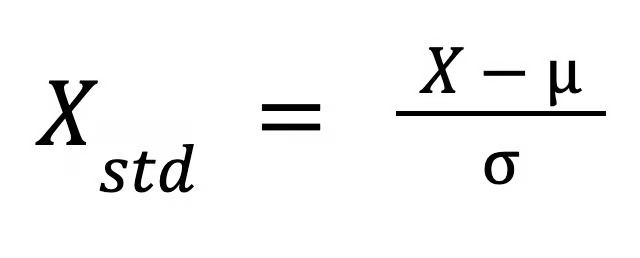

> 2. **Applying One-Hot Encoding** to the categorical features using "OneHotEncoder" method. This process will be stored as categorical transformed pipeline.
>> Operation :: It converts categorical variables into a binary format. It creates new binary columns (0s and 1s) for each category in the original variable. Each category in the original column is represented as a separate column, where a value of 1 indicates the presence of that category, and 0 indicates its absence.

> 3. **ColumnTransformer** Preprocessing : Both the pipelines defined in the first two steps will be logged in the complete pipeline called preprocessing pipeline.

> 4. Instances of the model that are to be used for experimentation are made with default parameters and assigned to variable model as a dictionary which would later be used to iterate through all model when we different iterations of experiment.

> 5. We define set values for each hyperparameter of model type and store it to hyperparameter_grid dicionary. We will be iterating each of the hyperparameters through the models in later stage to find the best fit.

> 6. **GridSearchCV** method performs the operation of sweeping across all possible combinations of hyperparameter through the model types passed in its parameter and calculates the cross validation score (in our case *accuracy*)  for each of the hyperparamenter combination passed.
We are applying a 5-fold cross validation (explained in detail at later part) to the traininig model.

> 7. Once the model is trained on the train dataset, we check the performance of the model on each performance parameter using the *Test Dataset*.
(expained in detail at later part).

> 8. From all the dataset we select the model type with hyperparameters which gives the best performance parameter values and log it as an Artifact.

In [ ]:
# Pipeline for the applying then scaling
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Pipeline for OHE encoding the categorical columns
categorical_transformer = Pipeline(steps=[('onehot',
                                           OneHotEncoder(handle_unknown='ignore'))])

# The complete pipeline for applying the required transformatinons to the respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, catg_vars),
        ])

**Creating instances of Model with default parameters**

In [ ]:
models = {
    'GBoostClass': GradientBoostingClassifier(),
    'Decision_Tree': DecisionTreeClassifier(),
    'Random_Forest': RandomForestClassifier(),
    'K_Nearest_Neighbors': KNeighborsClassifier()
}

**Hyperparameters associated with each model type and list of values for each model**

In [ ]:
hyperparam_grids = {
    'GBoostClass': {'n_estimators': [50, 100, 200],
                'max_depth': [2, 3, 4],
                'learning_rate': [0.01, 0.1]},
    'Decision_Tree': {'max_depth': [3, 5, 7, 10]},
    'Random_Forest': {'n_estimators': [50, 100, 200],
                      'max_depth': [3, 5, 7, 10]},
    'K_Nearest_Neighbors': {'n_neighbors': [3, 5, 7, 10, 20],
                            'weights': ['uniform', 'distance']}
}

**Training the model on Train Dataset and Evaluating best model of each model type based on RMSE, R-square and Accuracy on Test Dataset**
> **Root Mean Squared Error (RMSE) -**
>> A measure of the average difference between the values predicted by a model and the actual values. A *lower RMSE value indicates a better model*.

> **R-squared (R2) -**
>> A measure of the proportion of variation in the outcome that is explained by the predictor variables. A *higher R-squared value indicates a better model*.

> **F1-Score -**
>> This is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases. F1-score is a better metric when there are imbalanced classes. A higher F1 score indicates that the model has high precision and recall, which is ideal.

>> From our primary analysis it is evident that the Target varible "GradeClass" has significant imbalance hence, we shall opt to evaluate model based on F1-Score.

> **Accuracy -**
>> It is a metric that measures how well a model's predictions match the actual labels. A higher accuracy indicates that the model's predictions are closer to the actual labels

> **K-Fold Cross-Validation -**
>> K-Fold Cross-Validation is a robust technique used to evaluate the performance of machine learning models. It helps ensure that the model generalizes well to unseen data by using different portions of the dataset for training and testing in multiple iterations.

>> 5-Fold Cross-Validation :: where the dataset is split into five parts, with each part serving as a test set in one of the five iterations, ensuring each segment is used for both training and testing.

>> 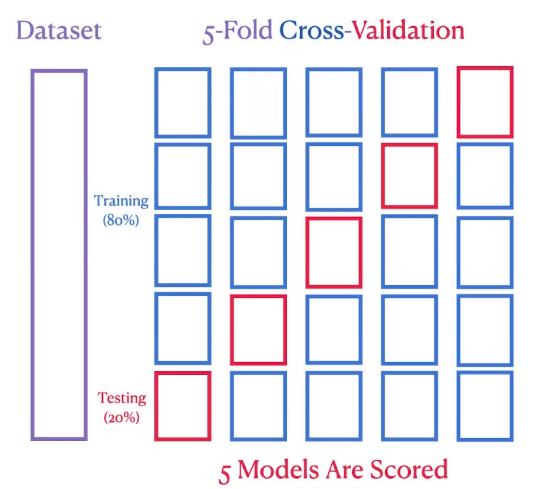

>> *source - https://www.datacamp.com/tutorial/k-fold-cross-validation*

In [ ]:
best_model_result_pl = {}
for model_name, model_type in models.items():
    reg_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model_type', model_type)])

    print(f"Name of Model :: {model_name}")

    # Extracting the hyperparameters (value) mapped against each module name (key) in hyperparam_grid dictionary
    model_hyperparams = {}
    for parameter, values in hyperparam_grids[model_name].items():
            # Updating the hyperparameter names to indicate the model name defined in the "reg_model" pipeline defined above.
            model_hyperparams[f"model_type__{parameter}"] = values
    print(f"Hyperparameter values passed :: {model_hyperparams}")

    # Performing GridSearchCV with 5-fold cross validation (by default the cv=None for 5-fold)
    grid = GridSearchCV(reg_model,
                       param_grid = model_hyperparams,
                       scoring='accuracy',
                       verbose=1)

    # Training the GridSearchCV
    grid.fit(train_comp_df[x_features], train_comp_df['GradeClass'])

    # Storing the best fit hyperparameter for the model in "best_model_result" dict
    best_model = grid.best_estimator_
    best_model_result_pl[model_name] = {'best_model': best_model,
                                     'best_params': grid.best_params_,
                                     'best_cv_score': grid.best_score_}


    # Printing f1 score and hyperparameters of the best fit model trained on Train Dataset
    print("F1-Score and Hyperparameter of the Best Fit model based on Train Dataset ::")
    print(f"Best Parameters :: {best_model_result_pl[model_name]['best_params']}")
    print(f"Best cross-validation F1-score :: {best_model_result_pl[model_name]['best_cv_score']:.2f}")

    # Evaluating the "best_model" on Test Dataset - Calculate and print accuracy, F1-score, RMSE and R-squared value (from classification report)
    y_pred = best_model_result_pl[model_name]['best_model'].predict(test_comp_df[x_features])

    accuracy = accuracy_score(test_comp_df['GradeClass'], y_pred)
    f1 = f1_score(test_comp_df['GradeClass'], y_pred, average='macro') # "macro average" means taking the average of the F1 scores for each class, treating all classes equally
    rmse = np.sqrt(mean_squared_error(test_comp_df['GradeClass'],
                                      best_model_result_pl[model_name]['best_model'].predict(test_comp_df[x_features])))
    r2 = r2_score(test_comp_df['GradeClass'],
                  best_model_result_pl[model_name]['best_model'].predict(test_comp_df[x_features]))

    print("Evaluating the best model on Test Dataset :: F1-Score, Accuracy and Detailed Classification Report")
    print(f"Accuracy = {accuracy:.2f}, F1-score = {f1:.2f}, RMSE = {rmse:.2f}, R-Squared = {r2:.2f}")
    print(classification_report(test_comp_df['GradeClass'], y_pred))

Name of Model :: GBoostClass
Hyperparameter values passed :: {'model_type__n_estimators': [50, 100, 200], 'model_type__max_depth': [2, 3, 4], 'model_type__learning_rate': [0.01, 0.1]}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
F1-Score and Hyperparameter of the Best Fit model based on Train Dataset ::
Best Parameters :: {'model_type__learning_rate': 0.1, 'model_type__max_depth': 4, 'model_type__n_estimators': 100}
Best cross-validation F1-score :: 0.72
Evaluating the best model on Test Dataset :: F1-Score, Accuracy and Detailed Classification Report
Accuracy = 0.69, F1-score = 0.51, RMSE = 0.77, R-Squared = 0.62
              precision    recall  f1-score   support

         0.0       0.38      0.24      0.29        21
         1.0       0.50      0.38      0.43        58
         2.0       0.46      0.52      0.49        69
         3.0       0.45      0.44      0.45        79
         4.0       0.88      0.92      0.90       251

    accuracy                        

#### **Track Experiment - Logging Models along with their Performance parameter values and Dataset used**
> The parameters that we will be storing for best model of each model type are as follows ::
>> **Based on Train Dataset -**
>> 1. K-Fold Cross Validation score : we will be using 5-fold/subsets of the train dataset to evaluate the model and will be using "Accuracy" score as a parameter to measure the performance.
>> 2. Best suited Hyperparameters
>> 3. F1-Score

>> **Based on Test Dataset -**
>> 1. Accuracy
>> 2. F1-Score
>> 3. Detailed Classification Report

**About Weights and Biasis Platform ::**
> Weights & Biases is the machine learning platform for developers to build better models faster. Use W&B's lightweight, interoperable tools to quickly track experiments, version and iterate on datasets, evaluate model performance, reproduce models, visualize results and spot regressions, and share findings.

**Steps Taken -**
1. We **set the authtoken** required to authorize the user and securely log the experiment details.

2. We define a "**sweeping_param_model**" method which performs the operations for each experiment run::
>- Select the model type based on the model name passed in the argument of method and apply the hyperparameters received in the 2nd argument of the method.
>- Run the pipeline that trains the model selected in pt1. on the train dataset on which column transformation is applied.
>- Perform cross validation operation (cross_val_score method) with accuracy as performance parameter on the trained model using the train dataset. We apply 5 fold cross validation as explaied in code above.
>- Measure the Perforamce of model using performance parameter using Accuracy, F1-Score, RMSE and R2 on the test dataset.
>- log the value for the model in weights and biasis platform.

3. Define the configuration for each model type by providing the following details ::
> -list of values for hyperparameters of each model type that we iterating through to measure the performance of each combination of hyperparameter values.
> -Performance values and trying to minimize or maximize. Our parameters are 'maximizing' the 'accuracy'.
> -Type of sweep we wish to perform :: grid (our choice), bayes or random.

4. For each model selected and from the list of models defined we provide a sweep no., this is done using "sweep" method. To the method, we pass the models configuration and project name under which the each experiment run is to be logged.

5. Sweep agent (agent) which performs the job of creating all forms of combinations for a list of values given for a hyperparameters (defined in Pt.3)of the model selected through the user defined function 'sweeping_param_model'.

In [ ]:
!pip install wandb

In [ ]:
import wandb
import os
from sklearn.model_selection import KFold

# Storing the W&B authkey as an environment variable to ease of accessing
os.environ["WANDB_API_KEY"] = "0a420cd939204c34c67ea714fe3f05c9f4f4e224"

In [ ]:
def sweeping_params_model(model_name, config=None):
  # Defining the arguments for the K-Fold
  # n_splits - train/test indices to split data in train/test sets - b/w 2 to 5
  # shuffle - "True" to shuffle the data before splitting into batches
  # randomize - "42", since we are shuffling the dataset, to maintain the reproducibility we will be using random state 42.
  k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

  model_name = model_name

  best_model_result={}
  with wandb.init(config=config):
        config = wandb.config

        match model_name :
          case  'GBoostClass':
            reg_model = GradientBoostingClassifier(
                n_estimators=config.n_estimators,
                learning_rate=config.learning_rate,
                max_depth=config.max_depth)
          case  'Decision_Tree':
            reg_model = DecisionTreeClassifier(
                max_depth=config.max_depth)
          case  'Random_Forest':
            reg_model = RandomForestClassifier(
                n_estimators=config.n_estimators,
                max_depth=config.max_depth)
          case  'K_Nearest_Neighbors':
            reg_model = KNeighborsClassifier(
                n_neighbors=config.n_neighbors,
                weights=config.weights)

        train_model = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('model_type', reg_model)])

        # Performing GridSearchCV with 5-fold cross validation (by default the cv=None for 5-fold)
        cv_scores = cross_val_score(train_model,
                                    train_comp_df[x_features],
                                    train_comp_df['GradeClass'],
                                    cv = k_fold,
                                    scoring='accuracy'                          )

        train_model.fit(train_comp_df[x_features], train_comp_df['GradeClass'])

        best_model_result[model_name]= {
                    "model": train_model,
                    "cv_accuracy": list(cv_scores),
                    "cv_accuracy_mean": cv_scores.mean(),
                    "cv_accuracy_std": cv_scores.std(),
                }

        # Evaluating the "best_model" on Test Dataset - Calculate and print accuracy, F1-score, RMSE and R-squared value (from classification report)
        y_pred = train_model.predict(test_comp_df[x_features])

        accuracy = accuracy_score(test_comp_df['GradeClass'], y_pred)
        f1 = f1_score(test_comp_df['GradeClass'], y_pred, average='macro') # "macro average" means taking the average of the F1 scores for each class, treating all classes equally
        rmse = np.sqrt(mean_squared_error(test_comp_df['GradeClass'],
                                          train_model.predict(test_comp_df[x_features])))
        r2 = r2_score(test_comp_df['GradeClass'],
                      train_model.predict(test_comp_df[x_features]))

        # Log metrics to WandB
        wandb.log( {"cv_accuracy_mean": best_model_result[model_name]["cv_accuracy_mean"],
                    "cv_accuracy_std": best_model_result[model_name]["cv_accuracy_std"],
                    "prediction_accuracy": accuracy,
                    "prediction_f1": f1,
                    "rmse" : rmse,
                    "r2": r2,
                    } )


In [ ]:
sweep_config = {
 'GBoostClass':{
    "method": "grid",  # Can be 'grid', 'random', or 'bayes'
    "metric": {"name": "accuracy", "goal": "maximize"},
    "parameters": {
        "n_estimators": {
            "values": [50, 100, 200]
        },
        "max_depth": {
            "values": [2,3,4]  # Depths to evaluate
        },
        "learning_rate": {
            "values": [0.01, 0.1]
        }
    }
  },
  'Decision_Tree':{
    "method": "grid",  # Can be 'grid', 'random', or 'bayes'
    "metric": {"name": "accuracy", "goal": "maximize"},
    "parameters": {
        "max_depth": {
            "values": [3, 5, 7, 10]  # Depths to evaluate
        }
    }
  },
  'Random_Forest':{
    "method": "grid",  # Can be 'grid', 'random', or 'bayes'
    "metric": {"name": "accuracy", "goal": "maximize"},
    "parameters": {
        "n_estimators": {
            "values": [50, 100, 200]
        },
        "max_depth": {
            "values": [3, 5, 7, 10]  # Depths to evaluate
        },
    },
  },
  'K_Nearest_Neighbors':{
    "method": "grid",  # Can be 'grid', 'random', or 'bayes'
    "metric": {"name": "accuracy", "goal": "maximize"},
    "parameters": {
        "n_neighbors": {
            "values": [3, 5, 7, 10, 20]  # Depths to evaluate
        },
        "weights": {
            "values": ['uniform', 'distance']
        }
    }
  }
 }

In [ ]:
for model_name, config_params in sweep_config.items():
  sweep_id = wandb.sweep(config_params, project="Student_Grade_Predictor")
  wandb.agent(sweep_id,
            function=lambda: sweeping_params_model(model_name))  # Run all experiments

Create sweep with ID: 05bedy76
Sweep URL: https://wandb.ai/sriramgopal-indian-school-of-business/Student_Grade_Predictor/sweeps/05bedy76


wandb: Agent Starting Run: 1n46yjkb with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 2
wandb: 	n_estimators: 50
wandb: Currently logged in as: sriramgopal (sriramgopal-indian-school-of-business). Use `wandb login --relogin` to force relogin


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.50662
cv_accuracy_std,0.02132
prediction_accuracy,0.5251
prediction_f1,0.13772
r2,-0.63702


wandb: Agent Starting Run: ghhw7dpg with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 2
wandb: 	n_estimators: 100


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.66202
cv_accuracy_std,0.02343
prediction_accuracy,0.6569
prediction_f1,0.42065
r2,0.55869


wandb: Agent Starting Run: t3ssslx5 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 2
wandb: 	n_estimators: 200


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.66899
cv_accuracy_std,0.03124
prediction_accuracy,0.67992
prediction_f1,0.47295
r2,0.59243


wandb: Agent Starting Run: 4vbljkml with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	n_estimators: 50


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.53659
cv_accuracy_std,0.03276
prediction_accuracy,0.55439
prediction_f1,0.21865
r2,-0.33337


wandb: Agent Starting Run: zfrl8nzt with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	n_estimators: 100


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.67526
cv_accuracy_std,0.0291
prediction_accuracy,0.68619
prediction_f1,0.45695
r2,0.59108


wandb: Agent Starting Run: w3sg2x8j with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 3
wandb: 	n_estimators: 200


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.68571
cv_accuracy_std,0.0263
prediction_accuracy,0.6841
prediction_f1,0.4714
r2,0.60188


wandb: Agent Starting Run: 3m2uqwo3 with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	n_estimators: 50


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.56864
cv_accuracy_std,0.01595
prediction_accuracy,0.57531
prediction_f1,0.28963
r2,-0.16467


wandb: Agent Starting Run: 8i8bw4ev with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	n_estimators: 100


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.68362
cv_accuracy_std,0.03049
prediction_accuracy,0.69874
prediction_f1,0.51922
r2,0.59918


wandb: Agent Starting Run: 6tlvlabp with config:
wandb: 	learning_rate: 0.01
wandb: 	max_depth: 4
wandb: 	n_estimators: 200


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.69338
cv_accuracy_std,0.03393
prediction_accuracy,0.69665
prediction_f1,0.51577
r2,0.61537


wandb: Agent Starting Run: zuwriwvh with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 2
wandb: 	n_estimators: 50


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.69547
cv_accuracy_std,0.03074
prediction_accuracy,0.69665
prediction_f1,0.50253
r2,0.59783


wandb: Agent Starting Run: lyfhjty4 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 2
wandb: 	n_estimators: 100


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.70523
cv_accuracy_std,0.02155
prediction_accuracy,0.70921
prediction_f1,0.50793
r2,0.60998


wandb: Agent Starting Run: pji0gk3h with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 2
wandb: 	n_estimators: 200


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.70035
cv_accuracy_std,0.02434
prediction_accuracy,0.69456
prediction_f1,0.48907
r2,0.60593


wandb: Agent Starting Run: ox95znbd with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	n_estimators: 50


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.70523
cv_accuracy_std,0.03763
prediction_accuracy,0.70711
prediction_f1,0.50337
r2,0.62212


wandb: Agent Starting Run: zr71pqzc with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	n_estimators: 100


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.70732
cv_accuracy_std,0.02796
prediction_accuracy,0.69038
prediction_f1,0.49882
r2,0.59243


wandb: Agent Starting Run: owbkxo9x with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 3
wandb: 	n_estimators: 200


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.70383
cv_accuracy_std,0.02924
prediction_accuracy,0.67992
prediction_f1,0.47947
r2,0.58838


wandb: Agent Starting Run: luh6t992 with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	n_estimators: 50


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.7122
cv_accuracy_std,0.02538
prediction_accuracy,0.70502
prediction_f1,0.5462
r2,0.61268


wandb: Agent Starting Run: xaenpitu with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	n_estimators: 100


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.71498
cv_accuracy_std,0.02648
prediction_accuracy,0.68828
prediction_f1,0.50973
r2,0.61672


wandb: Agent Starting Run: b7o2ydjg with config:
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	n_estimators: 200


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.70941
cv_accuracy_std,0.02704
prediction_accuracy,0.69247
prediction_f1,0.51499
r2,0.60863


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Create sweep with ID: wssuy5i3
Sweep URL: https://wandb.ai/sriramgopal-indian-school-of-business/Student_Grade_Predictor/sweeps/wssuy5i3


wandb: Agent Starting Run: pxp0jkae with config:
wandb: 	max_depth: 3


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.66341
cv_accuracy_std,0.02296
prediction_accuracy,0.66318
prediction_f1,0.42475
r2,0.56814


wandb: Agent Starting Run: 5gvgdmke with config:
wandb: 	max_depth: 5


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.6662
cv_accuracy_std,0.02507
prediction_accuracy,0.69456
prediction_f1,0.47211
r2,0.58164


wandb: Agent Starting Run: o17qo4em with config:
wandb: 	max_depth: 7


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.66132
cv_accuracy_std,0.01111
prediction_accuracy,0.66527
prediction_f1,0.46981
r2,0.5425


wandb: Agent Starting Run: y8zub66m with config:
wandb: 	max_depth: 10


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.61254
cv_accuracy_std,0.01625
prediction_accuracy,0.59414
prediction_f1,0.44263
r2,0.34951


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Create sweep with ID: n2o5wnsx
Sweep URL: https://wandb.ai/sriramgopal-indian-school-of-business/Student_Grade_Predictor/sweeps/n2o5wnsx


wandb: Agent Starting Run: k3rqa6w4 with config:
wandb: 	max_depth: 3
wandb: 	n_estimators: 50


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.50801
cv_accuracy_std,0.02036
prediction_accuracy,0.5251
prediction_f1,0.13772
r2,-0.63702


wandb: Agent Starting Run: h4849ofp with config:
wandb: 	max_depth: 3
wandb: 	n_estimators: 100


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.50662
cv_accuracy_std,0.02166
prediction_accuracy,0.5251
prediction_f1,0.13772
r2,-0.63702


wandb: Agent Starting Run: auov7m2t with config:
wandb: 	max_depth: 3
wandb: 	n_estimators: 200


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.50662
cv_accuracy_std,0.02166
prediction_accuracy,0.5251
prediction_f1,0.13772
r2,-0.63702


wandb: Agent Starting Run: d5z5bzs2 with config:
wandb: 	max_depth: 5
wandb: 	n_estimators: 50


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.57073
cv_accuracy_std,0.0427
prediction_accuracy,0.57113
prediction_f1,0.24584
r2,-0.12688


wandb: Agent Starting Run: vigi77ts with config:
wandb: 	max_depth: 5
wandb: 	n_estimators: 100


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.55819
cv_accuracy_std,0.02152
prediction_accuracy,0.56904
prediction_f1,0.2265
r2,-0.0864


wandb: Agent Starting Run: 7fbkginq with config:
wandb: 	max_depth: 5
wandb: 	n_estimators: 200


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.57422
cv_accuracy_std,0.03576
prediction_accuracy,0.61715
prediction_f1,0.2998
r2,0.25099


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ghj0km8j with config:
wandb: 	max_depth: 7
wandb: 	n_estimators: 50


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.65436
cv_accuracy_std,0.02048
prediction_accuracy,0.66318
prediction_f1,0.40502
r2,0.47502


wandb: Agent Starting Run: axneg7o9 with config:
wandb: 	max_depth: 7
wandb: 	n_estimators: 100


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.65226
cv_accuracy_std,0.02336
prediction_accuracy,0.61925
prediction_f1,0.33378
r2,0.35491


wandb: Agent Starting Run: b3osuqhe with config:
wandb: 	max_depth: 7
wandb: 	n_estimators: 200


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.65645
cv_accuracy_std,0.02027
prediction_accuracy,0.66946
prediction_f1,0.40256
r2,0.55599


wandb: Agent Starting Run: jbl9mbro with config:
wandb: 	max_depth: 10
wandb: 	n_estimators: 50


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.66272
cv_accuracy_std,0.028
prediction_accuracy,0.68619
prediction_f1,0.47345
r2,0.57354


wandb: Agent Starting Run: dry2sld7 with config:
wandb: 	max_depth: 10
wandb: 	n_estimators: 100


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.67735
cv_accuracy_std,0.02221
prediction_accuracy,0.67364
prediction_f1,0.43998
r2,0.56409


wandb: Agent Starting Run: w4wo1nlk with config:
wandb: 	max_depth: 10
wandb: 	n_estimators: 200


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.67456
cv_accuracy_std,0.02793
prediction_accuracy,0.66946
prediction_f1,0.44021
r2,0.57354


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


Create sweep with ID: bgoidl3o
Sweep URL: https://wandb.ai/sriramgopal-indian-school-of-business/Student_Grade_Predictor/sweeps/bgoidl3o


wandb: Agent Starting Run: urey6yx4 with config:
wandb: 	n_neighbors: 3
wandb: 	weights: uniform


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.55401
cv_accuracy_std,0.03013
prediction_accuracy,0.54393
prediction_f1,0.34745
r2,0.12413


wandb: Agent Starting Run: c213r535 with config:
wandb: 	n_neighbors: 3
wandb: 	weights: distance


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.58049
cv_accuracy_std,0.02518
prediction_accuracy,0.57113
prediction_f1,0.38681
r2,0.27933


wandb: Agent Starting Run: a7sltan0 with config:
wandb: 	n_neighbors: 5
wandb: 	weights: uniform


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.59652
cv_accuracy_std,0.03736
prediction_accuracy,0.60879
prediction_f1,0.41332
r2,0.40484


wandb: Agent Starting Run: k328tuhv with config:
wandb: 	n_neighbors: 5
wandb: 	weights: distance


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.5993
cv_accuracy_std,0.03385
prediction_accuracy,0.60251
prediction_f1,0.39055
r2,0.39


wandb: Agent Starting Run: 8k9n5dvo with config:
wandb: 	n_neighbors: 7
wandb: 	weights: uniform


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.62021
cv_accuracy_std,0.02474
prediction_accuracy,0.60879
prediction_f1,0.39259
r2,0.41564


wandb: Agent Starting Run: tor8ld8h with config:
wandb: 	n_neighbors: 7
wandb: 	weights: distance


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.62369
cv_accuracy_std,0.0228
prediction_accuracy,0.61925
prediction_f1,0.39519
r2,0.42104


wandb: Agent Starting Run: fjexo3ks with config:
wandb: 	n_neighbors: 10
wandb: 	weights: uniform


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.63693
cv_accuracy_std,0.01964
prediction_accuracy,0.63389
prediction_f1,0.39102
r2,0.44668


wandb: Agent Starting Run: xs8rldpt with config:
wandb: 	n_neighbors: 10
wandb: 	weights: distance


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.62439
cv_accuracy_std,0.02036
prediction_accuracy,0.63808
prediction_f1,0.41008
r2,0.44533


wandb: Agent Starting Run: qmzagld1 with config:
wandb: 	n_neighbors: 20
wandb: 	weights: uniform


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.62439
cv_accuracy_std,0.0223
prediction_accuracy,0.62552
prediction_f1,0.35085
r2,0.48177


wandb: Agent Starting Run: f2hsz8kg with config:
wandb: 	n_neighbors: 20
wandb: 	weights: distance


cv_accuracy_mean,▁
cv_accuracy_std,▁
prediction_accuracy,▁
prediction_f1,▁
r2,▁
rmse,▁
cv_accuracy_mean,0.623
cv_accuracy_std,0.01809
prediction_accuracy,0.62343
prediction_f1,0.36075
r2,0.46827


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


**Retrieve Performance measure for each model type - each run -**

In this step we use the Weights and Biasis platform API to pull the performance paramter measured in each experiment run along with the run name and display i

In [ ]:
api = wandb.Api()

all_runs = api.runs("sriramgopal-indian-school-of-business/Student_Grade_Predictor", order="+summary_metrics.prediction_accuracy")


data = []
for run in all_runs:
    data.append({
        "Model Name": run.name,
        "Accuracy": run.summary.get('prediction_accuracy'),
        "F1-Score": run.summary.get('prediction_f1'),
        **run.config
    })

# Load into a DataFrame
modelData_df = pd.DataFrame(data)

# Display the DataFrame
modelData_df

,Model Name,Accuracy,F1-Score,max_depth,n_estimators,learning_rate,weights,n_neighbors
0,swept-sweep-2,0.525105,0.137723,3.0,100.0,NaN,NaN,NaN
1,rural-sweep-1,0.525105,0.137723,3.0,50.0,NaN,NaN,NaN
2,smart-sweep-1,0.525105,0.137723,2.0,50.0,0.01,NaN,NaN
3,deep-sweep-3,0.525105,0.137723,3.0,200.0,NaN,NaN,NaN
4,twilight-sweep-1,0.543933,0.347451,NaN,NaN,NaN,uniform,3.0
...,...,...,...,...,...,...,...,...
69,hearty-sweep-2,NaN,NaN,3.0,100.0,NaN,NaN,NaN
70,winter-sweep-2,NaN,NaN,2.0,100.0,0.01,NaN,NaN
71,earthy-sweep-3,NaN,NaN,2.0,200.0,0.01,NaN,NaN
72,tough-sweep-2,NaN,NaN,3.0,100.0,NaN,NaN,NaN


In [ ]:
modelData_df[modelData_df['Model Name']=='comic-sweep-16']

,Model Name,Accuracy,F1-Score,max_depth,n_estimators,learning_rate,weights,n_neighbors
41,comic-sweep-16,0.705021,0.546202,4.0,50.0,0.1,NaN,NaN


#### **CONCLUSION - Model Selected**

Based on the performance parameters for each of the models, we can see that ***Gradient Boost Classifier Model*** is the best fit for the used dataset. It has the **highest RMSE**, **lowest R-squared**, **highest accuracy in terms of both k-fold cross validation score and predict values based on test dataset**.  

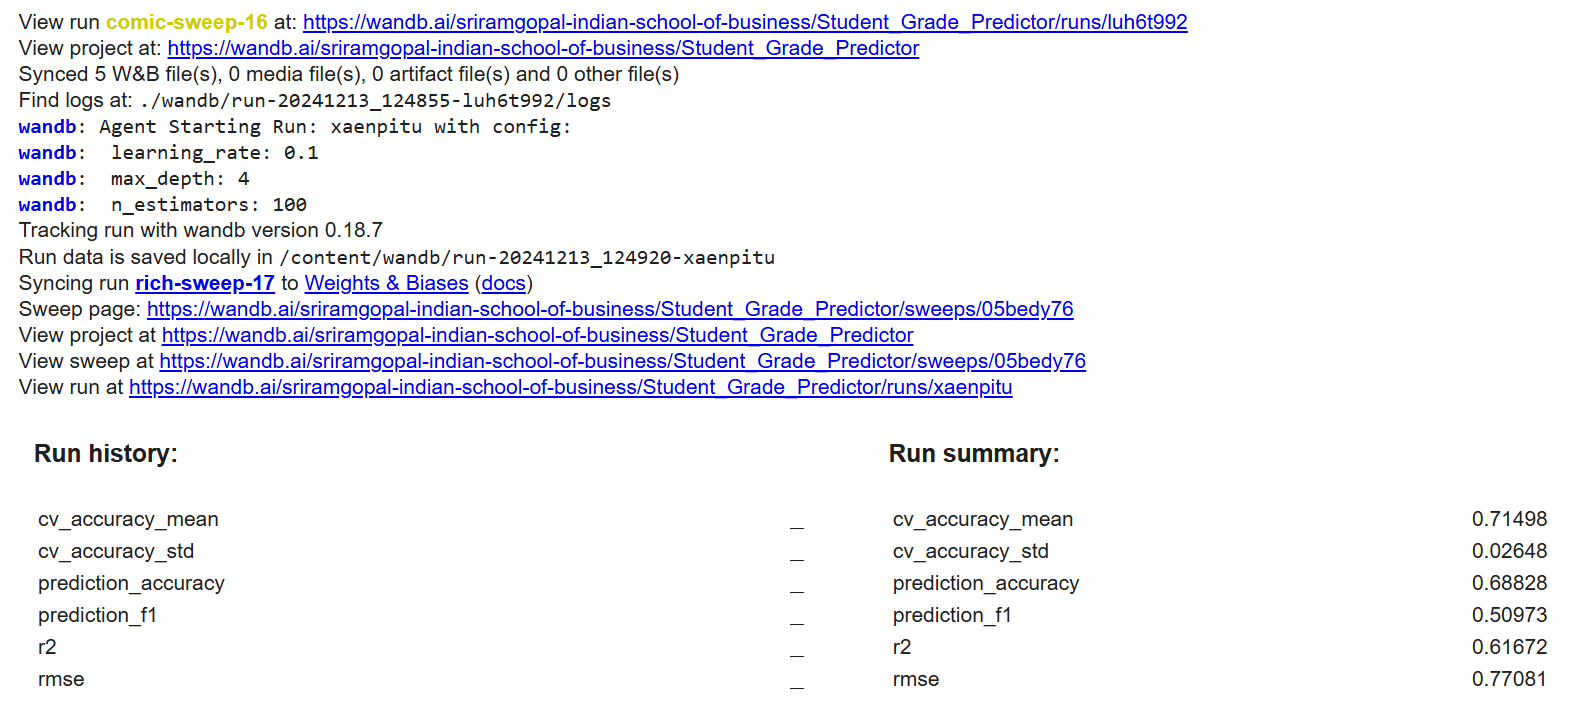

#### **Logging the model artifact in the tracking tools (Weights and Biases)**
> **Exporting to File -** we will be exporting the best model in pickle file format.
>> To perform this operation we will be using "dump" method (in joblib module) and dump the model code on the file in the path defined.

> **Logging as Artifact -** The model exported will be stored it in the Weights and Biases tracker as an Artifact.
>> Operation performed is as follows::
- Once the best model is selected, we create the artificate (with artifact name, type and desc.) that is to be logged.
- create a path in the Artifact section under our project.
- log the file containing the code as an artifact to weights and biasis under the path created in prev. step.

In [ ]:
from joblib import dump

# Creating the local path/folder to which the model is to be exported/dumped
MODEL_DIR = "./studentGradeModel"

os.mkdir(MODEL_DIR)

# Using 'dump' function to export the best model in pickle file format
dump(best_model_result_pl['GBoostClass']['best_model'], MODEL_DIR + "/" + 'StudentGradePredictor.pkl')

['./studentGradeModel/StudentGradePredictor.pkl']

In [ ]:
wandb.init(project='Student_Grade_Predictor',
           config=None,
           tags = ['Final Model'])
wandb.run.name = "FinalModel"

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


In [ ]:
# Creating an artifact to be logged using 'Artifact' method and providing the artifact name, type and desc.
model_artifact = wandb.Artifact("Student_GradeClass_Predictor",
                                type = 'model',
                                description = 'Gradient Boost Classifier Model  for Student Grade Class prediction')

In [ ]:
# Creating a path 'studentGradeModel' in Artifact section under project 'Student_Grade_Predictor'
model_artifact.add_dir(MODEL_DIR)

wandb: Adding directory to artifact (./studentGradeModel)... Done. 0.0s


In [ ]:
# Logging the artifact to the weights and biasis platform under the project name and path defined in above steps
wandb.run.log_artifact(model_artifact)

<Artifact Student_GradeClass_Predictor>

In [ ]:
# Saving the file and runs logged on W&B for versioning and reproducibilty and end the run
wandb.save()
wandb.finish()

wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


**Artifact logged in WANDB::**
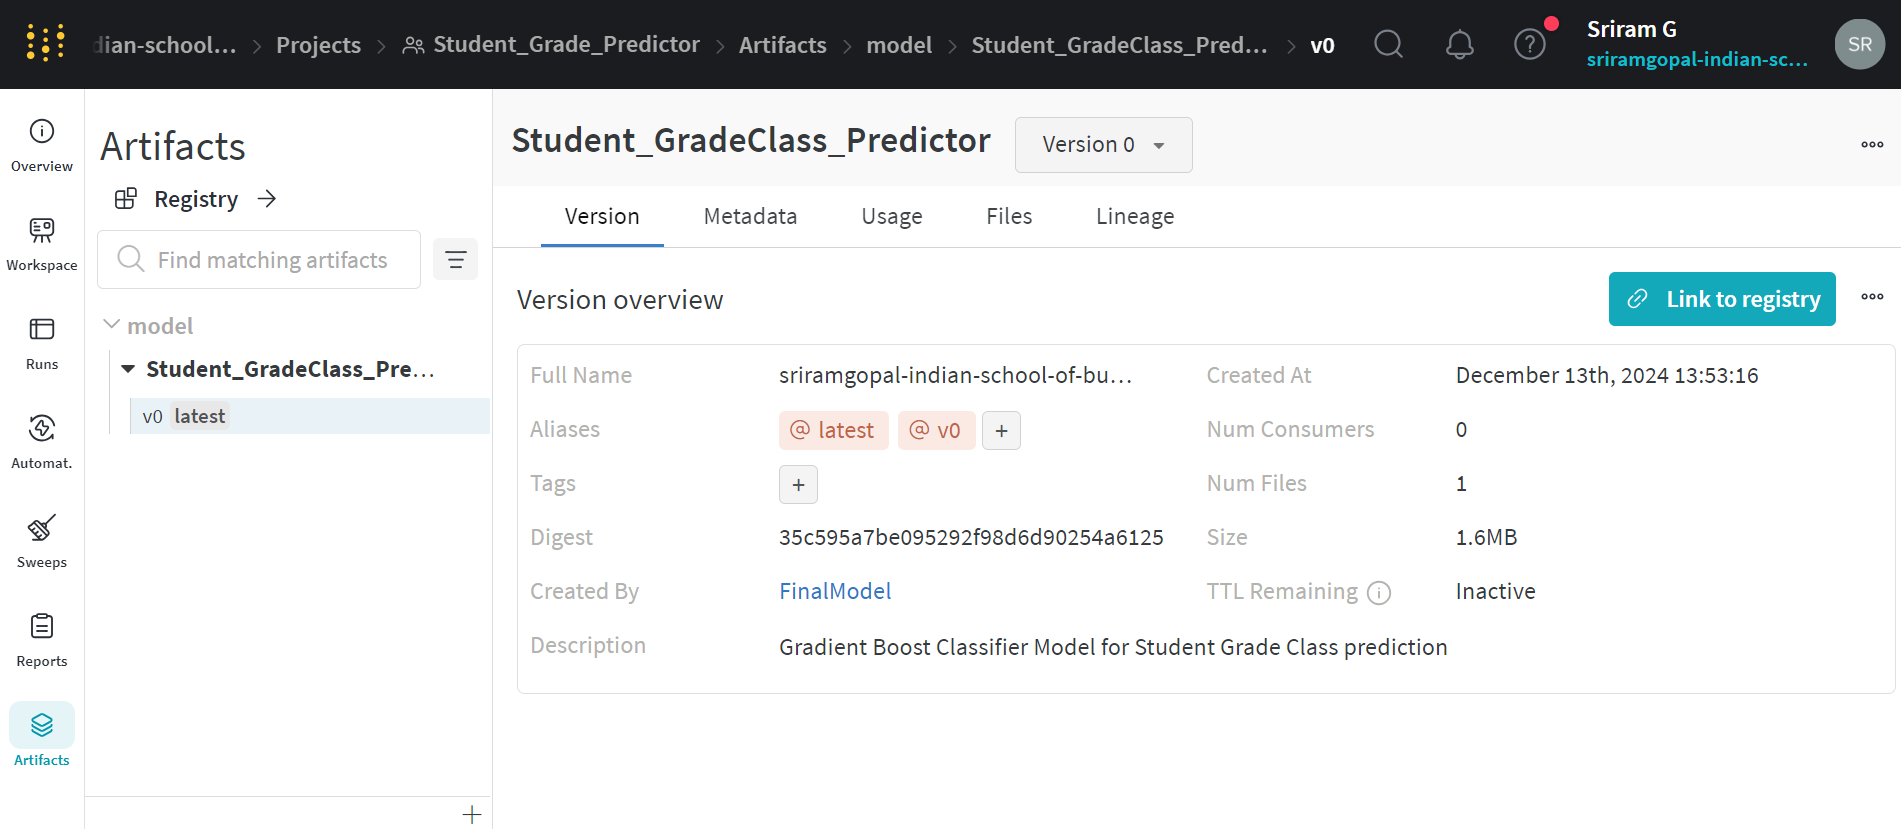

### **ANNEXURE**

**Google Drive ::**
> origninal datasource link :: https://drive.google.com/uc?id=1GY1mxS3rWuDx0O5QiAi65k0BQTpr4Xp_&export=download

>

**GitHub ::**

>Project link :: https://github.com/Sri1911/ML-Ops-ISB-Proj.git

>Project related Dataset link :: https://github.com/Sri1911/ML-Ops-ISB-Proj/tree/9cc26c40c770948231935c6d4ddf34058fb01590/Dataset
>>Train Dataset :: https://github.com/Sri1911/ML-Ops-ISB-Proj/tree/9cc26c40c770948231935c6d4ddf34058fb01590/Dataset/TrainDataset

>>Test Dataset :: https://github.com/Sri1911/ML-Ops-ISB-Proj/tree/9cc26c40c770948231935c6d4ddf34058fb01590/Dataset/TestDataset

>>Production Dataset :: https://github.com/Sri1911/ML-Ops-ISB-Proj/tree/9cc26c40c770948231935c6d4ddf34058fb01590/Dataset/ProductionDataset

![image.png](attachment:eefa2983-5b6b-4cf9-98ac-58d2dcb301d2.png)